# Topics

## 1. Image Manipulation



## On your home machines, do

\> pip install --upgrade pip


\> pip install scikit-image

## An image in Python is no more or less than a 2D numpy array!

<type 'numpy.ndarray'> (512, 512, 4) uint8


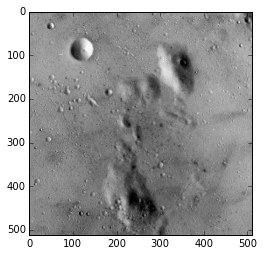

In [2]:
%matplotlib inline
'''

A RGBA images -- with four channels.  The last one, the "alpha-channel", allows for transparency, 

'''


import matplotlib.image as mpimg
import matplotlib.pyplot as plt

moon_im=mpimg.imread('moon.gif')
print type(moon_im), moon_im.shape, moon_im.dtype
plt.imshow(moon_im)

plt.show()

[[255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]]


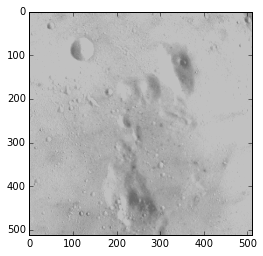

In [12]:
from copy import copy
print moon_im[:5,:5, 3]
moon_copy = copy(moon_im)
moon_copy[:,:,3] = 150

plt.imshow(moon_copy)
plt.show()

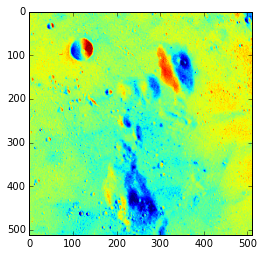

In [16]:
'''
Let's pick one channel, say R

Shown in false color

'''

moon = moon_im[:, :, 0]
plt.imshow(moon)
plt.show()

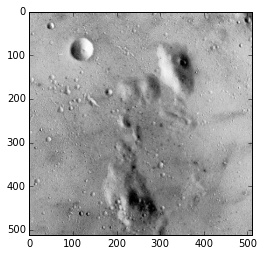

In [14]:
import matplotlib.cm as cm
plt.imshow(moon, cmap = cm.Greys_r)
plt.show()


<type 'numpy.ndarray'> (512, 512) uint8


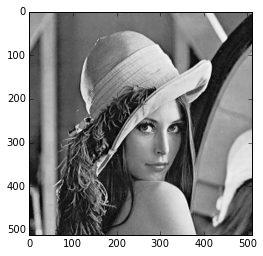

In [52]:
lena = mpimg.imread('lena512.jpg')
print type(lena), lena.shape, lena.dtype
plt.imshow(lena,  cmap = cm.Greys_r)
plt.show()

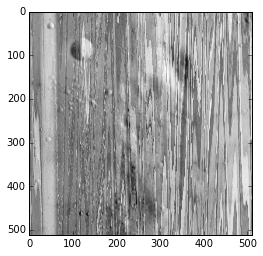

In [40]:
'''Blending'''
# To avoid saturation (just as for sound)
fac = 0.50

blend = fac*lena + (1-fac)*moon
plt.imshow(blend,  cmap = cm.Greys_r)
plt.show()

In [24]:
import numpy as np
x = np.arange(10)
x_new = np.roll(x, 2)
print x_new

[8 9 0 1 2 3 4 5 6 7]


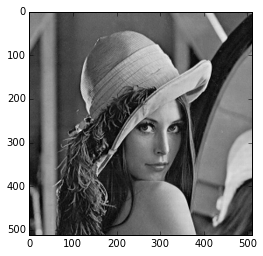

In [60]:
A = lena.shape[0] / 3.0
w = 2.0 / lena.shape[1]

shift = lambda x: A * np.sin(2.0*np.pi*x*w)

for i in range(lena.shape[0]):
    lena[:,0] = np.roll(lena[:,i], int(shift(i)))

plt.imshow(lena, cmap=plt.cm.gray)
plt.show()

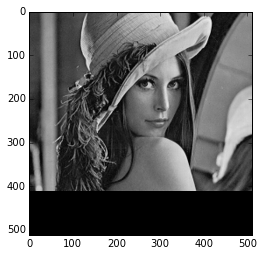

In [61]:
from skimage.transform import warp
def shift_left(xy):
    xy[: , 1] += 100
    return xy


lena_shift = warp(lena, shift_left)
plt.imshow(lena_shift, cmap=plt.cm.gray)
plt.show()

## Breakout: Simulate Fish Eye Lens:
## r = 0.8 * exp(r^(1/2.1) / 1.8)
source: http://wiki.panotools.org/Fisheye_Projection

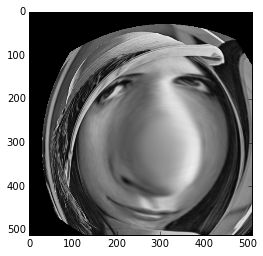

In [97]:
from skimage.transform import warp
def fish_eye(xy):
    center = np.mean(xy, axis = 0) + 55
    xc,yc = np.transpose(xy - center) 
    r = np.sqrt(xc**2+yc**2)
    theta = np.arctan2(np.float64(yc),xc)
    r_new = .09 * np.exp(r**(1/2.1) / 1.8)
    x_new = r_new*np.cos(theta)
    y_new = r_new*np.sin(theta)
    xy = np.column_stack((x_new, y_new)) + center
    return xy



lena_shift = warp(lena, fish_eye)
plt.imshow(lena_shift, cmap=plt.cm.gray)
plt.show()